## Plotly Cube: a cube with Plotly logo mapped on its faces ##

Our aim is to plot a cube having on each face the Plotly logo.
For, we choose a png image representing the Plotly logo, read it via matplotlib, and crop it such that to get a numpy array of shape (L,L).

Each cube face will be defined as a Plotly Surface, colored via a discrete colorscale, according to the values in the third array of the image, representing the blue chanel.

Read the image:

image shape (196L, 176L, 3L)


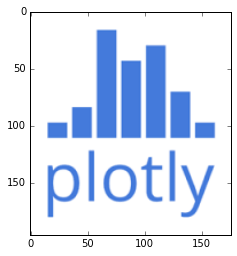

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
img=plt.imread('Data/Plotly-logo3.png')
plt.imshow(img)
print 'image shape', img.shape

Crop the image:

In [3]:
my_img=img[10:-10, :, :]
my_img.shape

(176L, 176L, 3L)

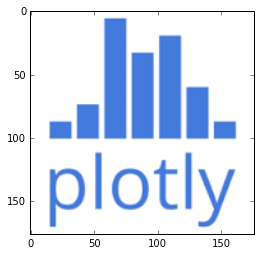

In [4]:
plt.imshow(my_img)

Since our image contains only two colors (white and blue) we select from `my_img` the array corresponding to the blue chanel:

In [5]:
pl_img=my_img[:,:, 2] # 
L, C=pl_img.shape
assert L==C

In [6]:
plotly_blue='rgb(68, 122, 219)'# the  blue color in Plotly logo

In [7]:
import plotly.plotly as py
from plotly.graph_objs import *

Define a  discrete colorscale from  `plotly_blue`, and the white color:

In [8]:
pl_scl=[ [0.0, 'rgb(68, 122, 219)'], #plotly_blue
         [0.5, 'rgb(68, 122, 219)'],
         [0.5, 'rgb(255,255,255)' ], #white
         [1.0, 'rgb(255,255,255)' ]]

Prepare data to represent a cube face as a Plotly Surface:

In [9]:
x=np.linspace(0, L-1,  L)
y=np.linspace(0, L-1, L)
X, Y = np.meshgrid(x, y)

Define the array  "equations" of cube faces.
The    upper face has the equation zM=L-1, the lower one, zm=0, and similarly for x=constant faces and y=constant faces:

In [10]:
zm=np.zeros(X.shape)
zM=(L-1)*np.ones(X.shape)

The next function returns  a Surface:

In [67]:
def make_cube_face(x,y,z, colorscale=pl_scl, is_scl_reversed=False, 
                   surfacecolor=pl_img, text='Plotly cube'):
    return Surface(x=x, y=y, z=z,
                   colorscale=colorscale,
                   reversescale=is_scl_reversed,
                   showscale=False,
                   surfacecolor=surfacecolor,
                   text=text,
                   hoverinfo='text'
                  )

In order to define a cube face as a Plotly Surface, it is referenced to a positively oriented cartesian system of coordinates, (X,Y), associated to the induced planar coordinate system of that face (when looking at it  from the outside) from the 3d system of coordinates of the cube. 

The image represented by `pl_img` is then  fitted to this system of coordinates,  eventually by  flipping its rows or columns. 

The Surface instances, representing the cube faces, are defined as follows: 

In [72]:
trace_zm=make_cube_face(x=X, y=Y, z=zm,  is_scl_reversed=True, surfacecolor=pl_img)
trace_zM=make_cube_face(x=X, y=Y, z=zM,  is_scl_reversed=True, surfacecolor=np.flipud(pl_img))
trace_xm=make_cube_face(x=zm, y=Y, z=X, surfacecolor=np.flipud(pl_img))
trace_xM=make_cube_face(x=zM, y=Y, z=X, surfacecolor=pl_img)
trace_ym=make_cube_face(x=Y, y=zm, z=X, surfacecolor=pl_img)
trace_yM=make_cube_face(x=Y, y=zM, z=X, surfacecolor=np.fliplr(pl_img))

Set the plot layout:

In [73]:
noaxis=dict( 
            showbackground=False,
            showgrid=False,
            showline=False,
            showticklabels=False,
            ticks='',
            title='',
            zeroline=False)

In [74]:
min_val=-0.01
max_val=L-1+0.01

In [75]:
layout = Layout(
         title="",
         width=500,
         height=500,
         scene=Scene(xaxis=XAxis(noaxis, range=[min_val, max_val]),
                     yaxis=YAxis(noaxis, range=[min_val, max_val]), 
                     zaxis=ZAxis(noaxis, range=[min_val, max_val]), 
                     aspectratio=dict(x=1,
                                      y=1,
                                      z=1
                                     ),
                     camera=dict(eye=dict(x=-1.25, y=-1.25, z=1.25)),
                    ),
         
        paper_bgcolor='rgb(240,240,240)',
        hovermode='closest',
        margin=dict(t=50)
        )

In [27]:
fig=Figure(data=Data([trace_zm, trace_zM, trace_xm, trace_xM, trace_ym, trace_yM]), layout=layout)
py.sign_in('empet', 'api_key')
py.iplot(fig, filename='Plotly-cube')


In [77]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()